In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
#resizing all images to this
IMAGE_SIZE=[224,224]
train_path='dataset/Train'
valid_path='dataset/Test'


In [4]:
mobilenet=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

In [5]:
for layer in mobilenet.layers:
    layer.trainable=False

In [6]:
folders=glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
mobilenet.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
x=Flatten()(mobilenet.output)

In [10]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=mobilenet.input,outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
##the last two layers are just added

In [13]:
from  tensorflow.keras.layers import MaxPooling2D

In [14]:
#creating model from scratch

In [15]:
model=Sequential()

In [16]:
#adding layers to the model
model.add(Conv2D(filters=16,kernel_size=2,padding='Same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [17]:
#tell the model cost function and optimization method

In [18]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [19]:
#we made the model. Now we need to import the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainDataGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
testDataGen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=trainDataGen.flow_from_directory('dataset/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [21]:
training_set

In [22]:
test_set=testDataGen.flow_from_directory('dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [45]:
r=model.fit_generator(
training_set,
validation_data=test_set,
epochs=75,
steps_per_epoch=len(training_set),
validation_steps=len(test_set))

<ipython-input-45-43099efcc056>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/75
13/13 [==============================] - 13s 890ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.4269 - val_accuracy: 0.9030
Epoch 2/75
13/13 [==============================] - 12s 891ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.4686 - val_accuracy: 0.8955
Epoch 3/75
13/13 [==============================] - 12s 879ms/step - loss: 0.0139 - accuracy: 0.9928 - val_loss: 0.2724 - val_accuracy: 0.9179
Epoch 4/75
13/13 [==============================] - 12s 916ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3185 - val_accuracy: 0.9254
Epoch 5/75
13/13 [==============================] - 12s 885ms/step - loss: 0.0093 - accuracy: 0.9952 - val_loss: 0.3444 - val_accuracy: 0.9254
Epoch 6/75
13/13 [==============================] - 11s 850ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.4566 - val_accuracy: 0.8806
Epoch 7/75
13/13 [==============================] - 12s 939ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.1834 - val_accuracy: 0.9403

13/13 [==============================] - 14s 1s/step - loss: 0.1357 - accuracy: 0.9688 - val_loss: 0.4270 - val_accuracy: 0.8657
Epoch 59/75
13/13 [==============================] - 14s 1s/step - loss: 0.0979 - accuracy: 0.9736 - val_loss: 0.2921 - val_accuracy: 0.9179
Epoch 60/75
13/13 [==============================] - 15s 1s/step - loss: 0.0285 - accuracy: 0.9880 - val_loss: 0.1831 - val_accuracy: 0.9328
Epoch 61/75
13/13 [==============================] - 14s 1s/step - loss: 0.1283 - accuracy: 0.9543 - val_loss: 0.4340 - val_accuracy: 0.8358
Epoch 62/75
13/13 [==============================] - 14s 1s/step - loss: 0.1764 - accuracy: 0.9375 - val_loss: 0.4174 - val_accuracy: 0.8358
Epoch 63/75
13/13 [==============================] - 13s 983ms/step - loss: 0.1597 - accuracy: 0.9399 - val_loss: 0.3000 - val_accuracy: 0.8582
Epoch 64/75
13/13 [==============================] - 16s 1s/step - loss: 0.1144 - accuracy: 0.9663 - val_loss: 0.1887 - val_accuracy: 0.9328
Epoch 65/75
13/13 [===

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save('model.h5')

In [48]:
y_pred=model.predict(test_set)

5/5 [==============================] - 1s 178ms/step


In [49]:
y_pred

array([[2.20741138e-01, 7.79258847e-01],
       [1.00000000e+00, 1.67563655e-38],
       [1.00000000e+00, 5.56282849e-22],
       [5.77511638e-02, 9.42248881e-01],
       [2.90578237e-06, 9.99997139e-01],
       [4.69208680e-06, 9.99995351e-01],
       [7.67290112e-05, 9.99923229e-01],
       [9.99993205e-01, 6.84348834e-06],
       [2.78473258e-01, 7.21526682e-01],
       [1.00000000e+00, 1.50156043e-09],
       [9.98477757e-01, 1.52223604e-03],
       [1.00000000e+00, 1.42019177e-15],
       [9.97445822e-01, 2.55413563e-03],
       [9.99948502e-01, 5.14750900e-05],
       [9.99996662e-01, 3.28183114e-06],
       [1.00000000e+00, 3.40754714e-14],
       [1.00000000e+00, 7.30508675e-23],
       [5.89379203e-03, 9.94106174e-01],
       [1.00000000e+00, 6.82917307e-15],
       [8.64562055e-04, 9.99135435e-01],
       [1.13569818e-04, 9.99886394e-01],
       [1.00000000e+00, 1.36003279e-18],
       [1.64942653e-03, 9.98350620e-01],
       [8.91110161e-04, 9.99108851e-01],
       [1.964353

In [50]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [51]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [52]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [53]:
model=load_model('model.h5')

In [54]:
img=image.load_img('Dataset/Test/Parasite/14.png',target_size=(224,224))

In [55]:
img=image.load_img('Dataset/Test/Uninfected/13.png',target_size=(224,224))

In [56]:
x=image.img_to_array(img)

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
x.shape

(224, 224, 3)

In [60]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [61]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [62]:
img_data.shape

(1, 224, 224, 3)

In [63]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 288ms/step


In [64]:
model.predict(img_data)

1/1 [==============================] - 0s 78ms/step


array([[1., 0.]], dtype=float32)

In [65]:
if a==1:
    print("Uninfected")
else:
    print("Infected")

Infected


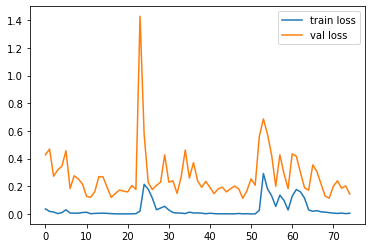

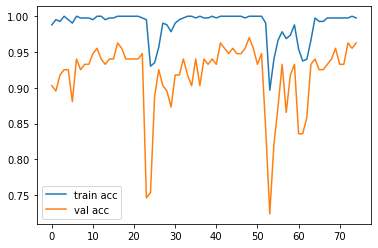

<Figure size 432x288 with 0 Axes>

In [66]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
